# Импортирование данных

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap

df=pd.read_csv('/content/drive/MyDrive/Project_chicago/Crime Prediction in Chicago_Dataset (1).csv')

#Анализ датасета до обработки

In [ ]:
df.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day of Week
0,12592454,JF113025,2022-01-14 15:55:00,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)",1,14,4
1,12785595,JF346553,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)",8,5,4
2,12808281,JF373517,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)",8,14,6


In [ ]:
df.shape

(239558, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [ ]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.395580e+05,239558.000000,239558.00000,239548.000000,239558.000000,2.348910e+05,2.348910e+05,239558.0,234891.000000,234891.000000
mean,1.273144e+07,1154.023276,11.31053,23.385029,36.268474,1.165381e+06,1.887038e+06,2022.0,41.845612,-87.668599
std,7.082019e+05,707.909870,7.07555,14.210565,21.553814,1.679375e+04,3.229564e+04,0.0,0.088833,0.061010
min,2.654300e+04,111.000000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.0,36.619446,-91.686566
25%,1.267802e+07,533.000000,5.00000,9.000000,22.000000,1.153949e+06,1.859284e+06,2022.0,41.769168,-87.710150
50%,1.276893e+07,1033.000000,10.00000,24.000000,32.000000,1.167256e+06,1.893383e+06,2022.0,41.863073,-87.661465
75%,1.285704e+07,1731.000000,17.00000,35.000000,53.000000,1.176856e+06,1.910066e+06,2022.0,41.909023,-87.626402
max,1.363051e+07,2535.000000,31.00000,50.000000,77.000000,1.205119e+06,1.951493e+06,2022.0,42.022548,-87.524532


Пропуски (NaNs):

In [ ]:
nuls = df.isnull().sum()
print(nuls)

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       0
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             0
FBI Code                   0
X Coordinate               0
Y Coordinate               0
Year                       0
Updated On                 0
Latitude                   0
Longitude                  0
Location                4667
Month                      0
Day                        0
Day of Week                0
dtype: int64


Дубликаты:

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Primary Type'].value_counts().reset_index()

,Primary Type,count
0,THEFT,54886
1,BATTERY,40946
2,CRIMINAL DAMAGE,27248
3,MOTOR VEHICLE THEFT,21463
4,ASSAULT,20809
5,DECEPTIVE PRACTICE,16854
6,OTHER OFFENSE,14609
7,ROBBERY,8963
8,WEAPONS VIOLATION,8780
9,BURGLARY,7593


# Обработка датасета

Разделение даты на временные промежутки:

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day of Week'] = df['Date'].dt.dayofweek

Заполнение пропусков модой (для категориальных данных) или средним/медианным значением (для числовых данных):

In [ ]:
df['Location Description'].fillna(df['Location Description'].mode()[0],inplace=True)
df['Latitude'].fillna(df['Latitude'].mean(),inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(),inplace=True)
df['Ward'].fillna(df['Ward'].mean(),inplace=True)
df['X Coordinate'].fillna(df['X Coordinate'].mean(),inplace=True)
df['Y Coordinate'].fillna(df['Y Coordinate'].mean(),inplace=True)

# EDA

Построение распределения количества преступлений по факту ареста (не арестован / арестован):

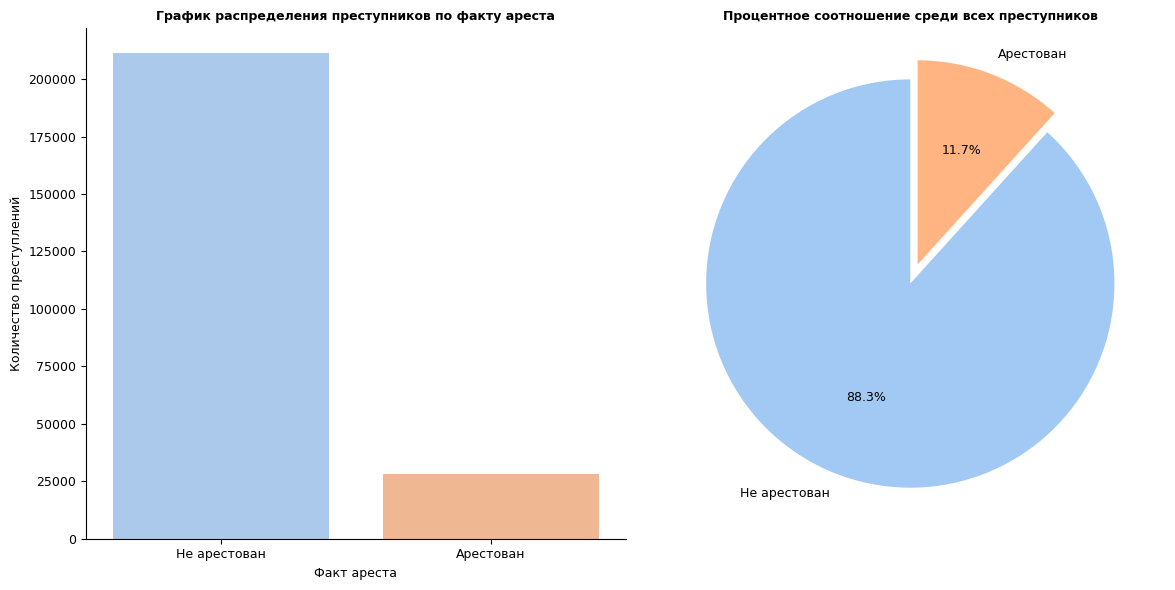

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12, 6))
sns.countplot(x=df['Arrest'],palette='pastel',ax=ax[0])
ax[0].set_title('График распределения преступников по факту ареста', fontsize=9, fontweight='bold')
ax[0].set_xlabel('Факт ареста',fontsize=9)
ax[0].set_ylabel('Количество преступлений',fontsize=9)
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Не арестован','Арестован'])
ax[0].tick_params(labelsize=9)
ax[0].legend().set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].pie(df['Arrest'].value_counts(),labels=['Не арестован','Арестован'],colors=sns.color_palette('pastel')[0:2],autopct='%1.1f%%',startangle=90, textprops={'fontsize':9}, explode=[0,0.1])
ax[1].set_title('Процентное соотношение среди всех преступников',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

График влияния типа преступления на задержание преступника:

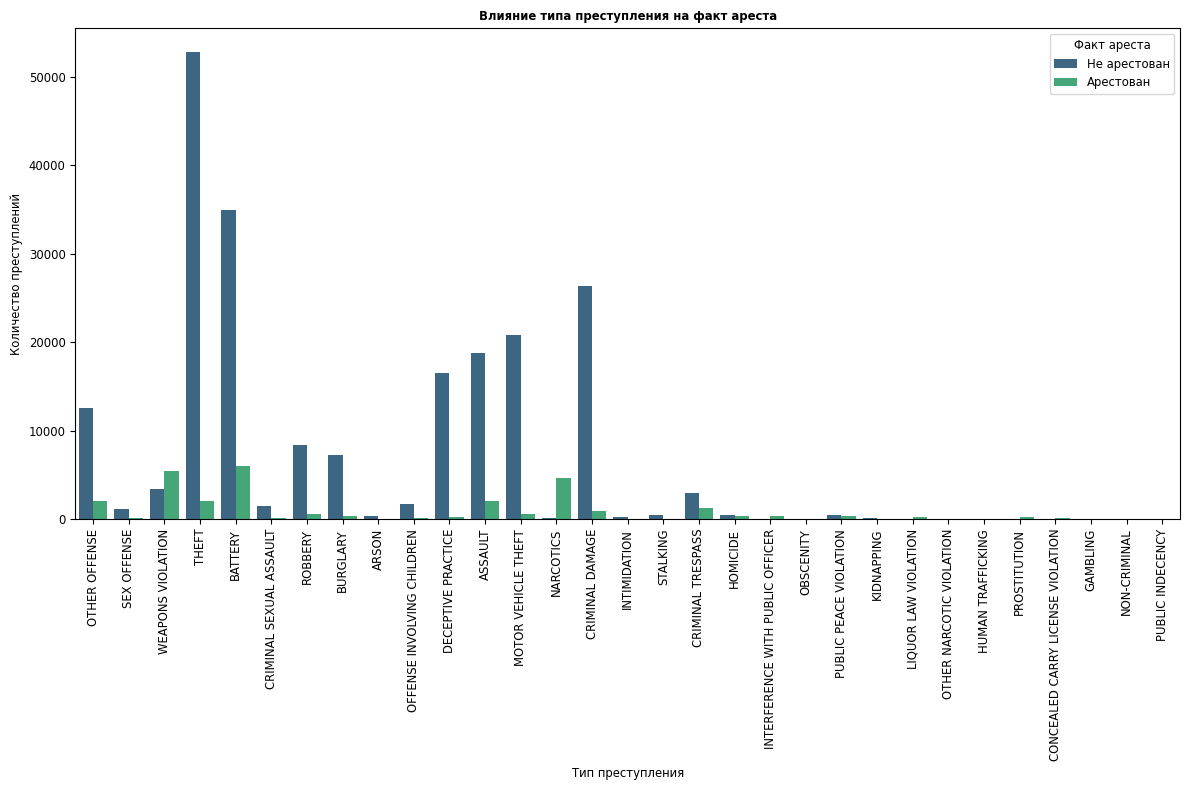

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['Primary Type'], hue=df['Arrest'], palette='viridis')
plt.title('Влияние типа преступления на факт ареста',fontsize='small',fontweight='bold')
plt.xlabel('Тип преступления',fontsize='small')
plt.ylabel('Количество преступлений',fontsize='small')
plt.xticks(rotation=90)
plt.tick_params(labelsize='small')
plt.legend(title='Факт ареста',title_fontsize='small',labels=['Не арестован','Арестован'],fontsize='small')
plt.tight_layout()
plt.show()

График распределения совершенных преступлений по месяцам (с фактом ареста):

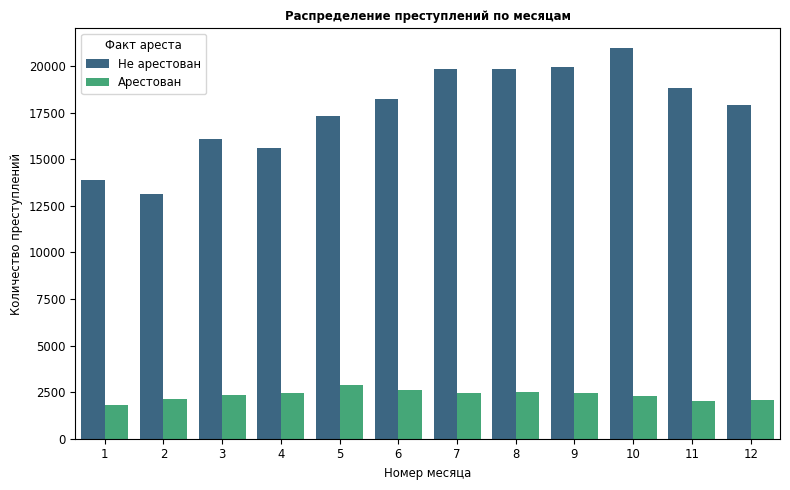

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Month'], hue=df['Arrest'], palette='viridis')
plt.title('Распределение преступлений по месяцам',fontsize='small',fontweight='bold')
plt.xlabel('Номер месяца',fontsize='small')
plt.ylabel('Количество преступлений',fontsize='small')
plt.tick_params(labelsize='small')
plt.legend(title='Факт ареста',title_fontsize='small',labels=['Не арестован','Арестован'],fontsize='small')
plt.tight_layout()
plt.show()

График распределения совершенных преступлений по дням недели (с фактом ареста):

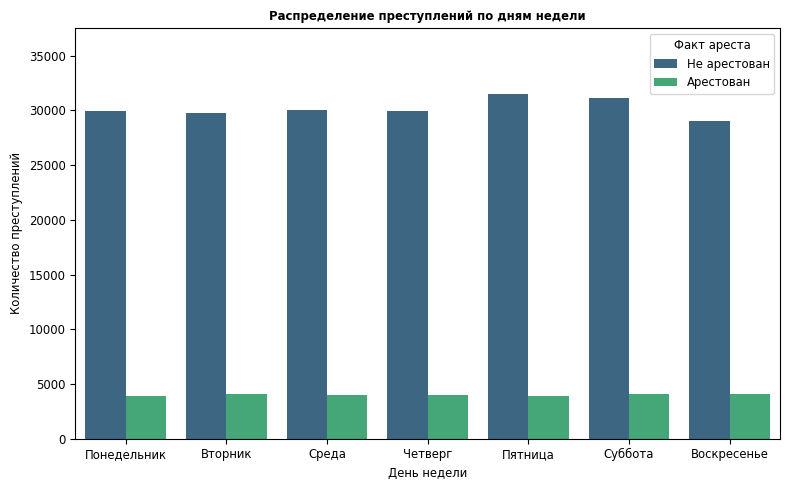

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Day of Week'], hue=df['Arrest'], palette='viridis')
plt.title('Распределение преступлений по дням недели',fontsize='small',fontweight='bold')
plt.xlabel('День недели',fontsize='small')
plt.ylabel('Количество преступлений',fontsize='small')
plt.ylim(0,37500)
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
plt.xticks(ticks=range(len(days)), labels=days)
plt.tick_params(labelsize='small')
plt.legend(title='Факт ареста',title_fontsize='small',labels=['Не арестован','Арестован'],fontsize='small')
plt.tight_layout()
plt.show()

Распределение категорий мест, где были совершены преступления (с фактом ареста):

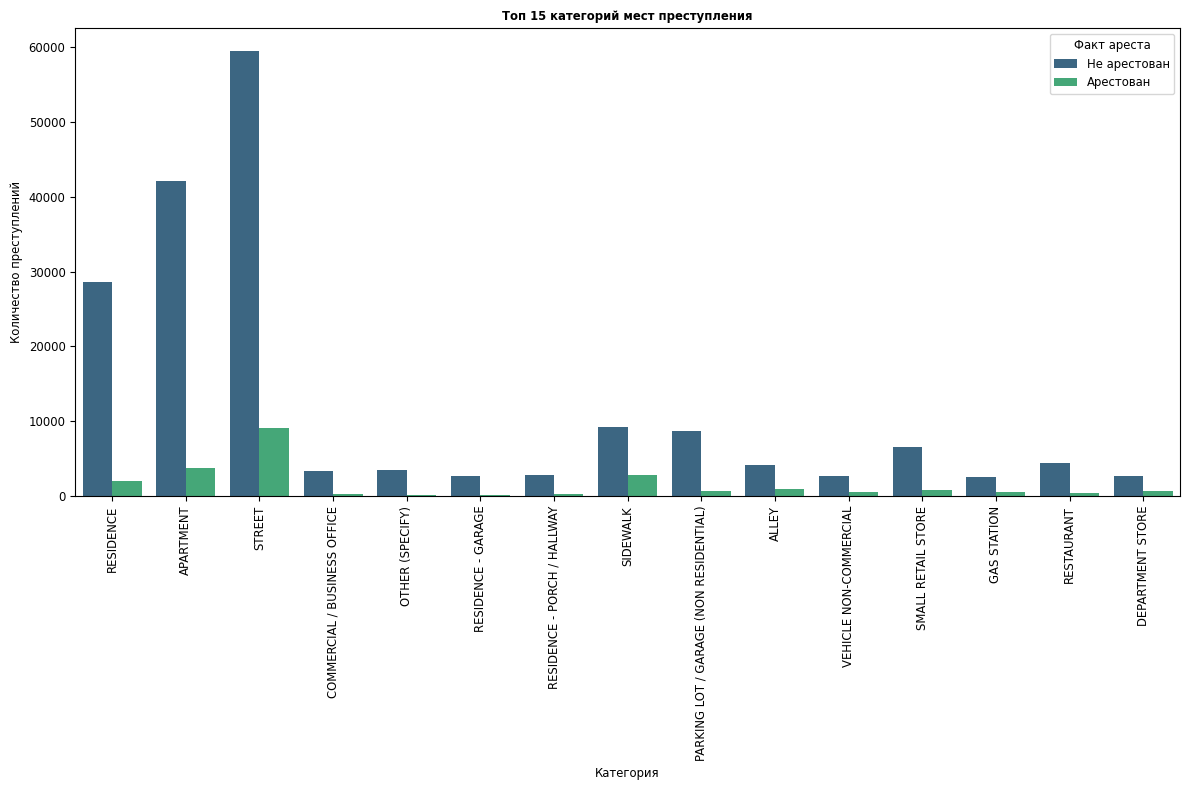

In [ ]:
top_loc = df['Location Description'].value_counts().head(15).index
top_lc = df[df['Location Description'].isin(top_loc)]
plt.figure(figsize=(12,8))
sns.countplot(x='Location Description', hue='Arrest',data=top_lc, palette='viridis')
plt.title('Топ 15 категорий мест преступления',fontsize='small',fontweight='bold')
plt.xlabel('Категория',fontsize='small')
plt.ylabel('Количество преступлений',fontsize='small')
plt.xticks(rotation=90)
plt.tick_params(labelsize='small')
plt.legend(title='Факт ареста',title_fontsize='small',labels=['Не арестован','Арестован'],fontsize='small')
plt.tight_layout()
plt.show()

Построение матрицы корреляций для числовых переменных:

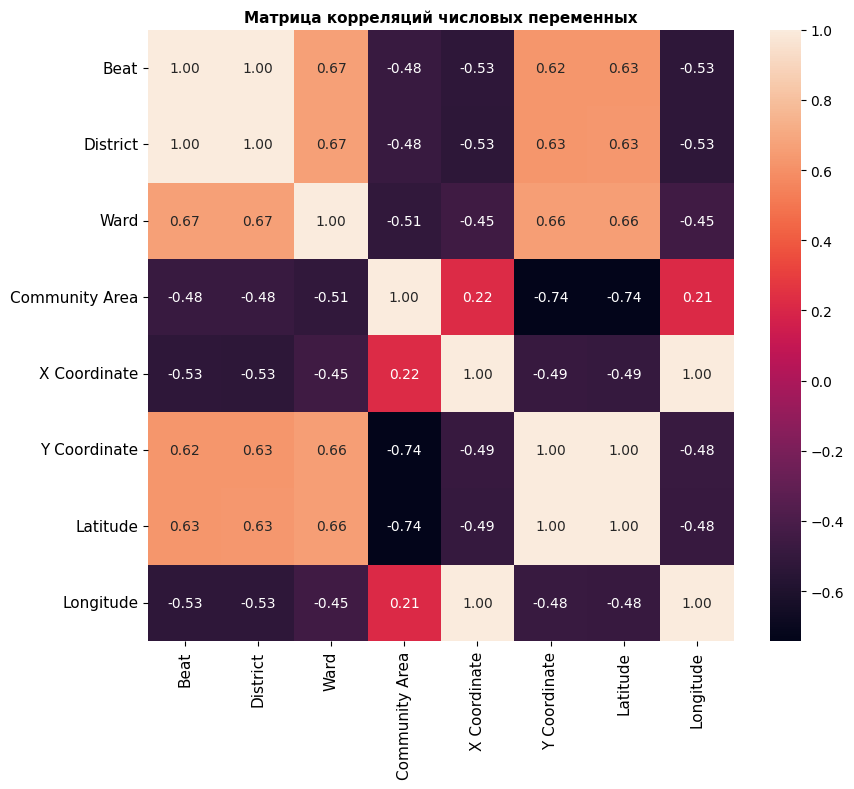

In [ ]:
plt.figure(figsize=(9,8))
sns.heatmap(df.drop(columns=['ID', 'Arrest', 'Year', 'Domestic','Date','Day of Week','Month','Day']).corr(numeric_only = True), annot=True, fmt='.2f')
plt.title('Матрица корреляций числовых переменных', fontsize=11,fontweight='bold')
plt.tick_params(labelsize=11)
plt.tight_layout()
plt.show()

Построение ящика с усами для числовых переменных, аанализ выбросов:

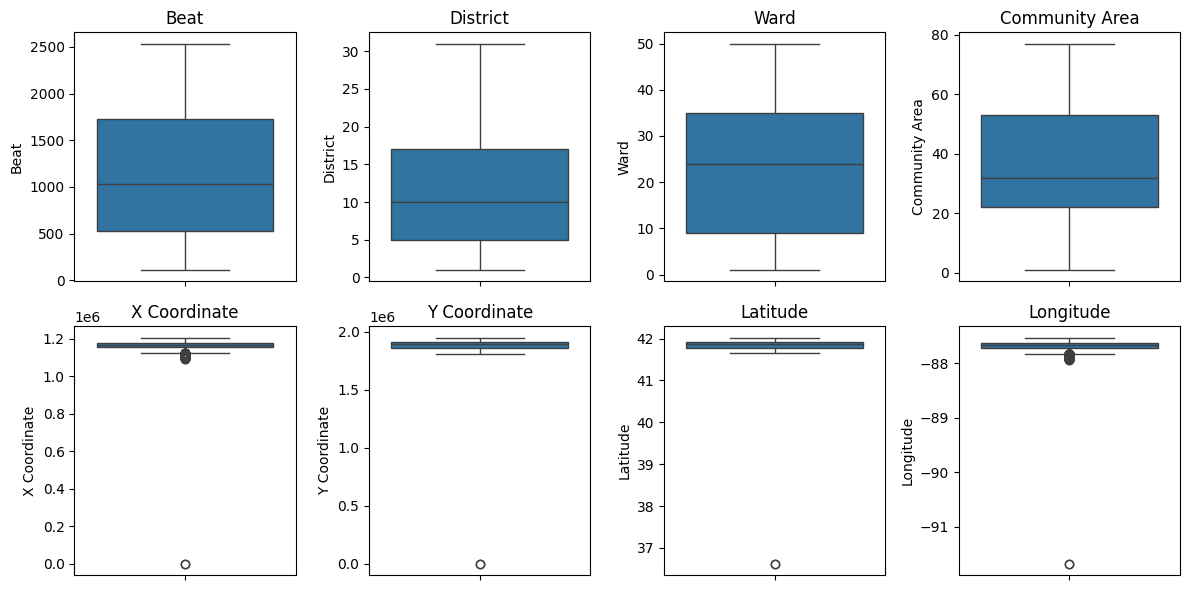

In [ ]:
num_cols=df.drop(columns=['ID', 'Arrest', 'Year', 'Domestic','Date','Day of Week','Month','Day']).select_dtypes(include=['number'])
fig,ax = plt.subplots(2,4,figsize=(12,6))
ax = ax.flatten()

for i,col in enumerate(num_cols):
  sns.boxplot(df,y=col,ax=ax[i],showfliers=True)
  ax[i].set_title(col)

plt.tight_layout()
plt.show()